In [1]:
import sys, os, glob, warnings, logging
import string
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest
from sw_qPCR import *

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [4]:
# Read in data
df_plate3 = get_plate_data('220627-plate3')
df_plate4 = get_plate_data('220627-plate4')
df_plate5 = get_plate_data('220627-plate5')

In [5]:
# Concatenate the data (stacking up and down)
df = pd.concat([df_plate3, df_plate4, df_plate5])
df.reset_index(inplace=True, drop=True)

In [6]:
df

,Well,Sample,Primer,Cq
0,A01,C-188-1,Rps29 v1,19.147778
1,A02,C-188-1,Rps29 v1,19.153126
2,A03,C-188-1,Rps29 v1,19.190614
3,A04,C-317-1,Rps29 v1,24.040855
4,A05,C-317-1,Rps29 v1,23.564872
...,...,...,...,...
172,E08,C-318-5,Itga6 v1,25.255417
173,E09,C-318-5,Itga6 v1,25.073371
174,E10,C-319-5,Itga6 v1,31.078961
175,E11,C-319-5,Itga6 v1,31.152747


In [7]:
df1 = get_expression_data(df, 'Itga3 v1')

In [8]:
df1

,Sample,Cq_ref,Cq_test,deltaCq,relExp,Group
0,C-188-1,19.163839,27.568621,8.404782,0.002951,C-188
1,C-188-2,25.860871,36.459749,10.598878,0.000645,C-188
2,C-188-3,20.509570,29.961668,9.452097,0.001428,C-188
3,C-188-4,20.949640,29.623080,8.673440,0.002449,C-188
4,C-188-5,20.861994,29.800349,8.938355,0.002038,C-188
5,C-317-1,23.827209,33.712199,9.884990,0.001058,C-317
6,C-317-2,20.755214,30.114298,9.359084,0.001523,C-317
7,C-317-3,25.432740,29.941388,4.508648,0.043930,C-317
8,C-317-4,21.337782,30.582441,9.244660,0.001648,C-317
9,C-317-5,22.973691,33.199052,10.225361,0.000835,C-317


In [12]:
df1_filtered = df1[df1.Cq_ref<23]

<AxesSubplot:xlabel='Group', ylabel='relExp'>

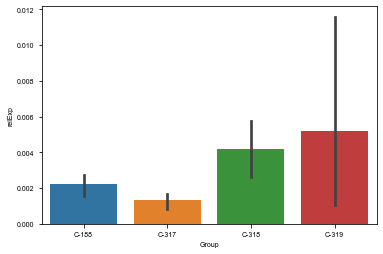

In [13]:
sns.barplot(data=df1_filtered, x='Group', y='relExp')

<AxesSubplot:xlabel='Group', ylabel='relExp'>

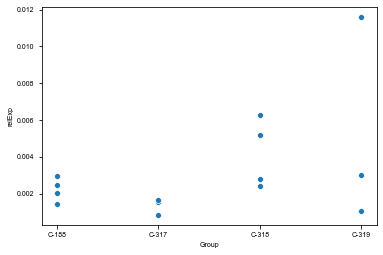

In [14]:
sns.scatterplot(data=df1_filtered, x='Group', y='relExp')

In [20]:
df2 = get_expression_data(df, 'Itga6 v1')

In [21]:
df2

,Sample,Cq_ref,Cq_test,deltaCq,relExp,Group
0,C-188-1,19.163839,22.680868,3.517028,0.087351,C-188
1,C-188-2,25.860871,33.004432,7.143562,0.007073,C-188
2,C-188-3,20.509570,24.906753,4.397183,0.047459,C-188
3,C-188-4,20.949640,25.057104,4.107464,0.058014,C-188
4,C-188-5,20.861994,25.133488,4.271494,0.051779,C-188
5,C-317-1,23.827209,28.535763,4.708554,0.038246,C-317
6,C-317-2,20.755214,25.588652,4.833439,0.035074,C-317
7,C-317-3,25.432740,29.850001,4.417262,0.046803,C-317
8,C-317-4,21.337782,26.170904,4.833123,0.035082,C-317
9,C-317-5,22.973691,28.017033,5.043342,0.030325,C-317


<AxesSubplot:xlabel='Group', ylabel='relExp'>

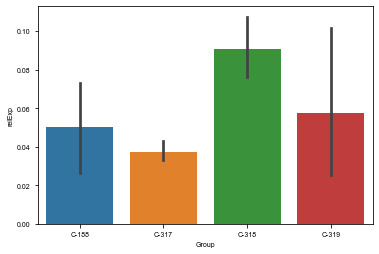

In [22]:
sns.barplot(data=df2, x='Group', y='relExp')

<AxesSubplot:xlabel='Group', ylabel='relExp'>

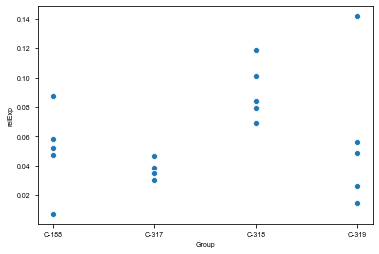

In [23]:
sns.scatterplot(data=df2, x='Group', y='relExp')

In [70]:
# Testing plotting melting curves
def get_melting_curves_data(plate_id, data_folder='../data/qPCR-data'):
    ''' Given a plate id:
          1. Locate the annotation csv file and the melting curves csv file
          2. Extract useful data, merge and return the data frame
    '''
    
    exported_csv_folders = glob.glob(os.path.join(data_folder, '*'+plate_id+'*'+os.path.sep))
    assert len(exported_csv_folders) == 1
    exported_csv_folder = exported_csv_folders[0]
    
    data_files = glob.glob(os.path.join(exported_csv_folder, '*Melt Curve Derivative Results_SYBR.csv'))
    assert len(data_files) == 1
    data_file = data_files[0]
    
    df = pd.read_csv(data_file)
    
    # drop the first column (empty)
    df = df.iloc[:, 1:]
    
    wells = []
    for i in string.ascii_uppercase[:8]:
        for j in range(1,13):
            wells.append(i+'{:02d}'.format(j))
    
    # rename columns to keep the well names consistent
    df.columns = ['Temperature'] + wells
    
    return df

def plot_melting_curves(plate_id, primer,
                        exclude_wells=None,
                        sample=None,
                        data_folder='../data/qPCR-data'):
    '''
    '''
    layout_to_annotation(plate_id)
    annotation_files = glob.glob(os.path.join(data_folder, '*'+plate_id+'*annotation.csv'))
    assert len(annotation_files) == 1
    annotation_file = annotation_files[0]

    df = pd.read_csv(annotation_file)
    df_annotation = df[['Well', 'Sample', 'Primer']]
    
    # select the wells based on the query of primer and sample
    if type(primer) is str:
        df_selected = df_annotation[df_annotation.Primer==primer]
    elif type(primer) is list:
        df_selected = df_annotation[df_annotation.Primer.isin(primer)]
        
    if sample is not None:
        if type(sample) is str:
            df_selected = df_selected[df_selected.Sample==sample]
        elif type(sample) is list:
            df_selected = df_selected[df_selected.Sample.isin(sample)]
    
    df = get_melting_curves_data(plate_id, data_folder)
    for well in df_selected.Well.tolist():
        if exclude_wells is None:
            plt.plot(df.Temperature, df[well])
        elif well not in exclude_wells:
            plt.plot(df.Temperature, df[well])
            

In [58]:
df = get_melting_curves_data('220627-plate2')

In [59]:
df.head()

,Temperature,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12
0,65.0,1.454877,-3.312484,-3.867710,-11.887255,-5.299782,-8.662307,-5.613364,-5.107449,-6.908295,...,-1.601167,-4.336527,-5.138667,0.563135,-4.889344,-7.431574,-4.902143,-4.600001,-5.455169,0.600081
1,65.5,3.152232,-7.177048,-8.380039,-25.755720,-11.482861,-18.768333,-12.162290,-11.066140,-14.967971,...,-3.469196,-9.395808,-11.133778,1.220126,-10.593579,-16.101744,-10.621310,-9.966669,-11.819533,1.300175
2,66.0,2.909753,-6.624967,-7.735421,-23.774510,-10.599564,-17.324615,-11.226729,-10.214898,-13.816589,...,-3.202335,-8.673054,-10.277334,1.126270,-9.778688,-14.863149,-9.804286,-9.200002,-10.910338,1.200161
3,66.5,2.909753,-6.624967,-7.735421,-23.774510,-10.599564,-17.324615,-11.226729,-10.214898,-13.816589,...,-3.202335,-8.673054,-10.277334,1.126270,-9.778688,-14.863149,-9.804286,-9.200002,-10.910338,1.200161
4,67.0,2.909753,-6.624967,-7.735421,-23.774510,-10.599564,-17.324615,-11.226729,-10.214898,-13.816589,...,-3.202335,-8.673054,-10.277334,1.126270,-9.778688,-14.863149,-9.804286,-9.200002,-10.910338,1.200161


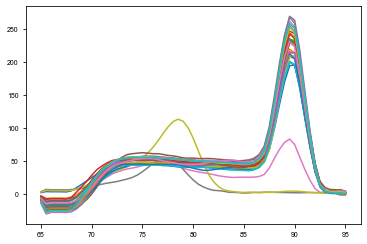

In [72]:
plot_melting_curves('220627-plate2', 'Serpinh1 sg1 v2')
# plot_melting_curves('220627-plate2', 'Serpinh1 sg1 v2', ['B01', 'B02', 'B03'])

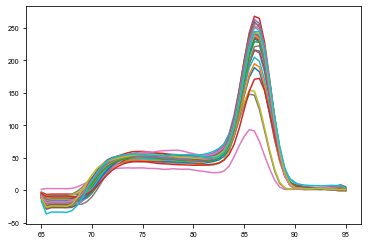

In [76]:
plot_melting_curves('220627-plate2', 'Serpinh1 sg2 v1')
# plot_melting_curves('220627-plate2', 'Serpinh1 sg2 v1', ['B07', 'B08', 'B09'])

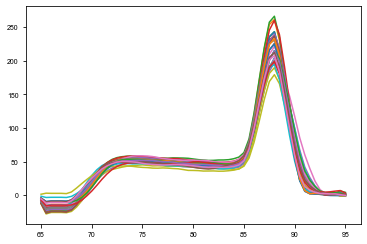

In [78]:
# plot_melting_curves('220627-plate2', 'Serpinh1 sg3 v1')
plot_melting_curves('220627-plate2', 'Serpinh1 sg3 v1', ['F02', 'G02', 'H02'])

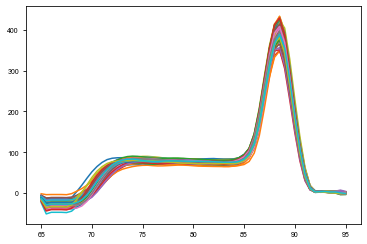

In [79]:
plot_melting_curves('220627-plate3', 'Rps29 v1')

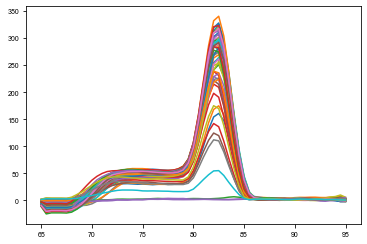

In [80]:
plot_melting_curves('220627-plate4', 'Itga3 v1')

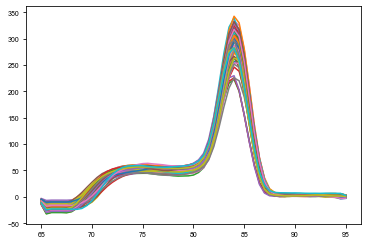

In [81]:
plot_melting_curves('220627-plate5', 'Itga6 v1')

In [82]:
df = get_melting_curves_data('220627-plate4')

In [84]:
df_des = df.describe().transpose()

In [87]:
df_des_selected = df_des[df_des['max']<100]

In [88]:
df_des_selected

,count,mean,std,min,25%,50%,75%,max
Temperature,61.0,80.000000,8.876467,65.000000,72.500000,80.000000,87.500000,95.000000
B01,61.0,1.711060,1.937336,-1.837209,0.456968,2.039379,2.938694,6.497265
B03,61.0,0.653266,1.759784,-3.066064,0.462292,1.162438,1.664942,5.157548
C11,61.0,0.654247,2.254326,-3.962630,-1.144113,1.373300,2.261796,4.987240
E12,61.0,12.255502,13.628308,0.289052,2.003677,7.033940,17.340363,54.845063
F01,61.0,0.720347,0.724656,-0.424999,0.261397,0.619465,1.076909,3.946777
F02,61.0,0.686501,0.671821,-0.818053,0.293229,0.702768,1.061714,2.946124
F03,61.0,0.787472,0.697868,-0.496704,0.258107,0.793034,1.430756,2.423318
F04,61.0,0.566426,0.640075,-2.043711,0.338719,0.731239,0.934882,1.645098
F05,61.0,0.700107,0.738857,-0.988836,0.247864,0.597376,1.114427,2.233724
